<a href="https://colab.research.google.com/github/LIZZETHGOMEZ/Econometria_/blob/School/Listo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ECONOMETRÍA
##Trabajo Final
* ### Cuenca Fitz Alexis Manuel
* ### Gomez Rodríguez Lizzeth
* ### Pineda Sandoval Tania Jocelyn




La base de datos a utilizar es la **ESRU-EMOVI 2017** que es una Encuesta de Movilidad Social del Centro de Estudios Espinosa Yglesias (CEEY), que se puede encontrar en la siguiente liga kjunto con el cuestionario: https://ceey.org.mx/contenido/que-hacemos/emovi

In [0]:
#Instalamos las paqueterías necesarias
!pip install pyreadstat
!pip install statsmodels
!pip install pandas plotnine
!pip install tabulate
!pip install numpy

In [0]:
#Importamos las librerías a utilizar
import pyreadstat #librería para leer  formato.dta
import pandas as pd #librería para manipulación de datos
import matplotlib #librería para graficar
from matplotlib import pyplot as plt #librería para graficar


import statsmodels.api as sm #librería para análisis estadístico
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit
from statsmodels.iolib.summary2 import summary_col

from tabulate import  tabulate


In [0]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

In [0]:
%matplotlib inline
import pylab as pl

In [0]:
import warnings
warnings.filterwarnings('ignore')
from plotnine import *

In [0]:
#Leemos la base de datos
emovi = pd.read_csv('Emovi4.csv')

In [0]:
emovi.head()

In [0]:
emovi.describe()

In [0]:
#Veamos cuantas personas son discriminadas
emovi.discriminacion.value_counts()

In [0]:
dis = emovi['discriminacion'].loc[emovi['discriminacion']==1]
dis1 = dis.value_counts()

In [0]:
#Extraemos a las personas que fueron discriminadas por cada area:
trabajo = emovi['dis_trabajo'].loc[emovi['dis_trabajo']==1]
trabajo1 = trabajo.value_counts()
escuela = emovi['dis_escuela'].loc[emovi['dis_escuela']==1]
escuela1 = escuela.value_counts()
oficina = emovi['dis_oficina'].loc[emovi['dis_oficina']==1]
oficina1 = oficina.value_counts()
hogar = emovi['dis_hogar'].loc[emovi['dis_hogar']==1]
hogar1 = hogar.value_counts()
barrio = emovi['dis_barrio'].loc[emovi['dis_barrio']==1]
barrio1 = barrio.value_counts()
otro = emovi['dis_otro'].loc[emovi['dis_otro']==1]
otro1 = otro.value_counts()


In [170]:
#Data Frame de Dsicriminación por lugares en Valores
table1 = pd.DataFrame({"Trabajo": trabajo1, "Escuela": escuela1, "Oficina": oficina1, "Hogar": hogar1, "Barrio": barrio1, "Otro": otro1})
table1

,Trabajo,Escuela,Oficina,Hogar,Barrio,Otro
1,114,88,65,51,128,37


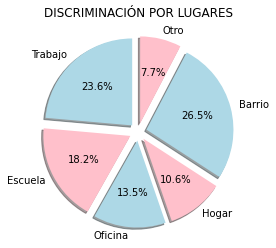

In [186]:
#GRAFICO DE DISCRIMINACIÓN POR LUGAR  
#Caracteristicas necesarias para el gráfico de pastel:
etiquetas = 'Trabajo', 'Escuela','Oficina','Hogar','Barrio', 'Otro'
tamaños = table1.values #Obtiene el array de los valores
colores = ['lightblue', 'pink',] #Colores para el piechart(gáfico de pastel)
resaltar = (0.1,0.1,0.1,0.1,0.1,0.1) #Separación para resaltar
# Plot
plt.pie(tamaños, explode=resaltar, labels=etiquetas, colors=colores,
autopct='%1.1f%%', shadow=True, startangle=90,) #Inicialización del objeto pie
plt.title("DISCRIMINACIÓN POR LUGARES")
plt.show() #Mostrar gráfica

In [0]:
#Sacamos porcentajes respecto a los individuos que constestaron que sí son discriminados
trabajo2 = (trabajo1/dis1)*100
escuela2 =(escuela1/dis1)*100
oficina2 =(oficina1/dis1)*100
hogar2 =(hogar1/dis1)*100
barrio2 = (barrio1/dis1)*100
otro2 = (otro1/dis1)*100

In [187]:
#Tabla Resumen de Discriminación por lugar en %
#No cuadra porque hay peronas que los discriminaron en varios lugares
#por lo cual se repiten en varios lugares
table = [["Trabajo",trabajo2],["Escuela",escuela2],["Oficina", oficina2],["Hogar",hogar2],["Barrio",barrio2],["Otro",otro2]]
print(tabulate(table))

-------  -------
Trabajo  32.6648
Escuela  25.2149
Oficina  18.6246
Hogar    14.6132
Barrio   36.6762
Otro     10.6017
-------  -------


#Estadpistica Descriptiva

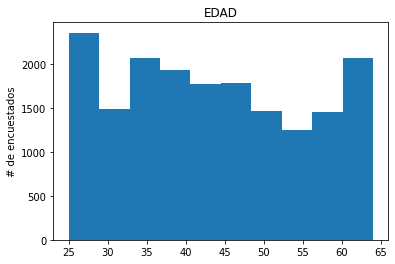

In [0]:
# plotting histogram 
plt.hist(emovi.edad, histtype='bar')

#plt.legend()
plt.ylabel('# de encuestados')
plt.title('EDAD')

plt.show()

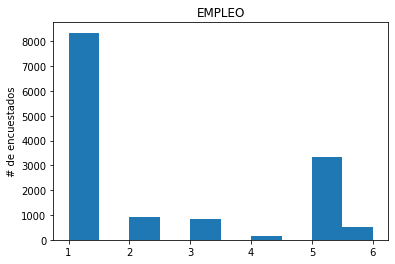

In [0]:
# plotting histogram in order to see
plt.hist(emovi.empleo, histtype='bar')

#plt.legend()
plt.ylabel('# de encuestados')
plt.title('EMPLEO')

plt.show()

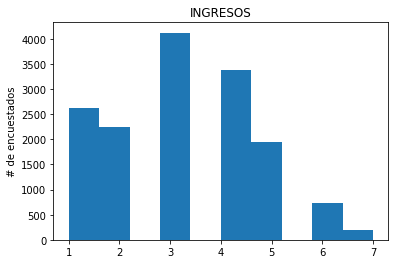

In [0]:
# plotting histogram in order to see
plt.hist(emovi.ingreso, histtype='bar')

#plt.legend()
plt.ylabel("# de encuestados")
plt.title("INGRESOS")

plt.show()

In [0]:
# Borrado de NA's 
#emovi.dropna(subset=['discriminacion', 'color', 'rururb', 'region','ingreso', 'empleo'])

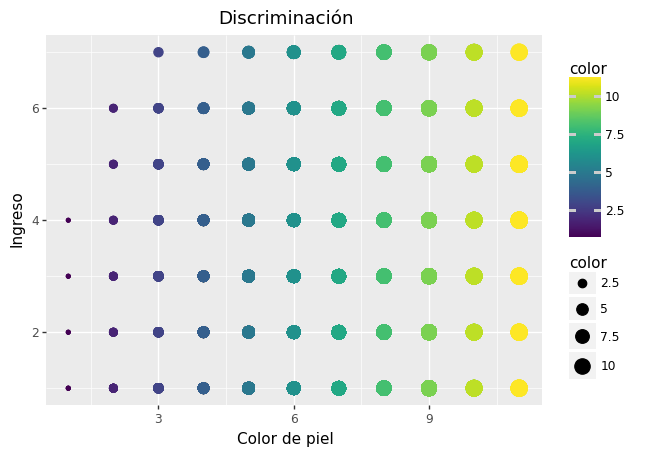

<ggplot: (-9223363257297465561)>

In [0]:
#DISCRIMINACION POR INGRESO
(ggplot(emovi)
 + aes(x='color', y='ingreso', color='color', size='color')
 + geom_point()
 + labs(title='Discriminación', x='Color de piel', y='Ingreso')
)

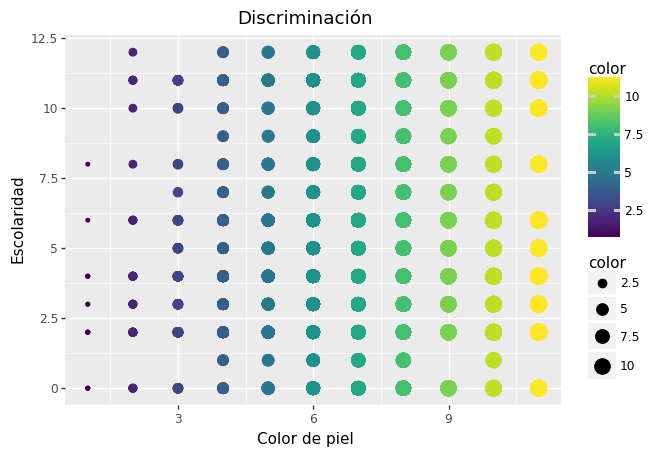

<ggplot: (8779556349574)>

In [0]:
#DISCRIMINACION POR ESCOLARIDAD
(ggplot(emovi)
 + aes(x='color', y='escolaridad', color='color', size='color')
 + geom_point()
 + labs(title='Discriminación', x='Color de piel', y='Escolaridad')
)

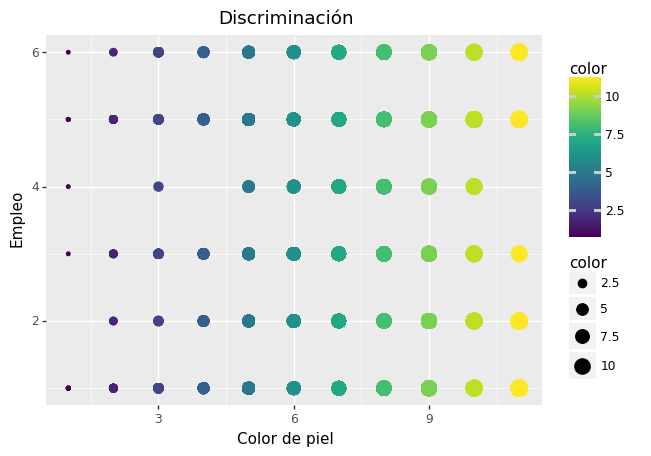

<ggplot: (-9223363257297860906)>

In [0]:
#DISCIRMINACION POR EMPLEO
(ggplot(emovi)
 + aes(x='color', y='empleo', color='color', size='color')
 + geom_point()
 + labs(title='Discriminación', x='Color de piel', y='Empleo')
)

In [177]:
#GRAFICO DE SEXO
#Caracteristicas necesarias para el gráfico de pastel:
etiquetas = 'Mujer', 'Hombre'
sexos = emovi['sexo'].value_counts() #Saca la frecuencia con la que se repiten en el data_frame los valores únicos por campo
tamaños = sexos.values #Obtiene el array de los valores
colores = ['lightblue', 'pink'] #Colores para el piechart(gáfico de pastel)
resaltar = (0.1, 0) #Separación para resaltar
sexos


2    10746
1     6919
Name: sexo, dtype: int64

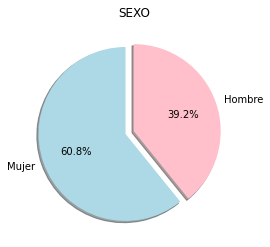

In [178]:
# Plot
plt.pie(tamaños, explode=resaltar, labels=etiquetas, colors=colores,
autopct='%1.1f%%', shadow=True, startangle=90,) #Inicialización del objeto pie
plt.title("SEXO")
plt.show() #Mostrar gráfica

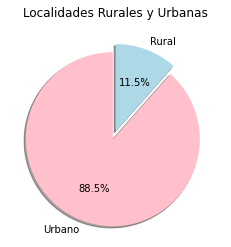

In [179]:
#GRAFICO DE LOCALIDADES
#Caracteristicas necesarias para el gráfico de pastel:
etiquetas = 'Urbano', 'Rural'
rural = emovi['rururb'].value_counts() #Saca la frecuencia con la que se repiten en el data_frame los valores únicos por campo
tamaños = rural.values #Obtiene el array de los valores
colores = ['pink', 'lightblue'] #Colores para el piechart(gáfico de pastel)
resaltar = (0.1, 0) #Separación para resaltar
# Plot
plt.pie(tamaños, explode=resaltar, labels=etiquetas, colors=colores,
autopct='%1.1f%%', shadow=True, startangle=90,) #Inicialización del objeto pie
plt.title("Localidades Rurales y Urbanas")
plt.show() #Mostrar gráfica


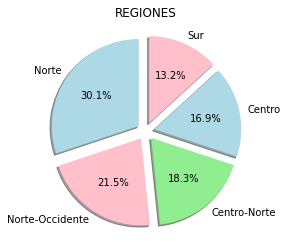

In [181]:
#GRAFICO DE REGIONES
#Caracteristicas necesarias para el gráfico de pastel:
etiquetas = 'Norte', 'Norte-Occidente','Centro-Norte','Centro','Sur'
reg = emovi['region'].value_counts() #Saca la frecuencia con la que se repiten en el data_frame los valores únicos por campo
tamaños = reg.values #Obtiene el array de los valores
colores = ['lightblue', 'pink','lightgreen'] #Colores para el piechart(gáfico de pastel)
resaltar = (0.1, 0.1,0.1,0.1,0.1) #Separación para resaltar
#Plot
plt.pie(tamaños, explode=resaltar, labels=etiquetas, colors=colores,
autopct='%1.1f%%', shadow=True, startangle=90,) #Inicialización del objeto pie
plt.title("REGIONES")
plt.show() #Mostrar gráfica

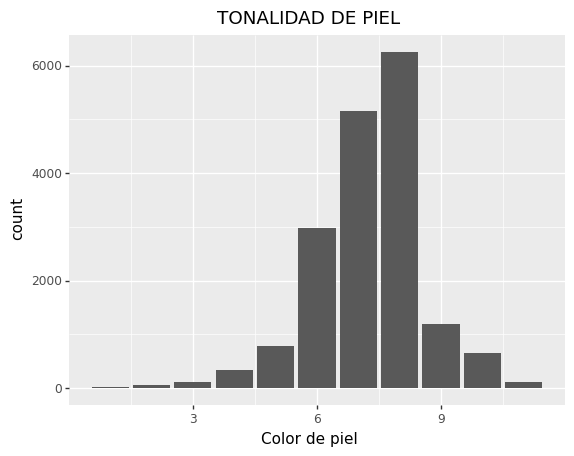

<ggplot: (8779561300758)>

In [0]:
#GRAFICO DE COLOR DE PIEL
(ggplot(emovi)         # defining what data to use
 + aes(x='color')    # defining what variable to use
 + geom_bar(size=15) # defining the type of plot to use
 + labs(title='TONALIDAD DE PIEL', x='Color de piel')
)

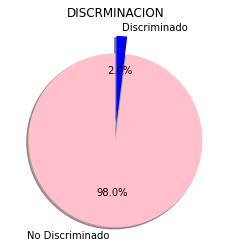

In [185]:
#GRAFICO DE DISCRIMINACION
#Caracteristicas necesarias para el gráfico de pastel:
etiquetas = 'No Discriminado','Discriminado'
dis = emovi['discriminacion'].value_counts() #Saca la frecuencia con la que se repiten en el data_frame los valores únicos por campo
tamaños = dis.values #Obtiene el array de los valores
colores = ['pink', 'blue'] #Colores para el piechart(gáfico de pastel)
resaltar = (0.1, 0.1) #Separación para resaltar
#Plot
plt.pie(tamaños, explode=resaltar, labels=etiquetas, colors=colores,
autopct='%1.1f%%', shadow=True, startangle=90,) #Inicialización del objeto pie
plt.title("DISCRMINACION")
plt.show() #Mostrar gráfica

#ANÁLISIS LOGÍSTICO

In [0]:
# Borrado de NA's 
emovi_1 = emovi.dropna(subset=['discriminacion', 'color', 'rururb', 'region', 'empleo', 'escolaridad', 'ingreso'])

In [0]:
X = emovi_1[['color', 'escolaridad', 'empleo']]
X = sm.add_constant(X)
Y = emovi_1['ingreso']
mdl = sm.MNLogit(Y, X)
mdl_fit = mdl.fit()

Optimization terminated successfully.
         Current function value: 1.644304
         Iterations 9


In [0]:
# Imprimiendo Resultados:
print(mdl_fit.summary())

                          MNLogit Regression Results                          
Dep. Variable:                ingreso   No. Observations:                12370
Model:                        MNLogit   Df Residuals:                    12346
Method:                           MLE   Df Model:                           18
Date:                Fri, 12 Jun 2020   Pseudo R-squ.:                 0.05772
Time:                        01:07:16   Log-Likelihood:                -20340.
converged:                       True   LL-Null:                       -21586.
Covariance Type:            nonrobust   LLR p-value:                     0.000
  ingreso=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.8745      0.192     -4.563      0.000      -1.250      -0.499
color           0.0828      0.025      3.371      0.001       0.035       0.131
escolaridad     0.0782      0.015      5.157    

In [0]:
# Efectos Marginnales:
mdl_margeff = mdl_fit.get_margeff()
print(mdl_margeff.summary())

       MNLogit Marginal Effects      
Dep. Variable:                ingreso
Method:                          dydx
At:                           overall
  ingreso=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
color          -0.0105      0.003     -3.795      0.000      -0.016      -0.005
escolaridad    -0.0032      0.001     -2.708      0.007      -0.006      -0.001
empleo          0.0163      0.002      8.184      0.000       0.012       0.020
-------------------------------------------------------------------------------
  ingreso=2      dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
color          -0.0032      0.002     -1.529      0.126      -0.007       0.001
escolaridad    -0.0155      0.001    -14.254      0.000      -0.018      -0.013
empleo          0.0071      0.001      4.843    

EMPLEO

In [0]:
X = emovi_1[['color', 'rururb', 'sexo','escolaridad']]
X = sm.add_constant(X)
Y = emovi_1['empleo']
mdl = sm.MNLogit(Y, X)
mdl_fit = mdl.fit()

Optimization terminated successfully.
         Current function value: 1.067294
         Iterations 8


In [0]:
# Imprimiendo Resultados:
print(mdl_fit.summary())

                          MNLogit Regression Results                          
Dep. Variable:                 empleo   No. Observations:                12370
Model:                        MNLogit   Df Residuals:                    12345
Method:                           MLE   Df Model:                           20
Date:                Fri, 12 Jun 2020   Pseudo R-squ.:                 0.08655
Time:                        01:11:04   Log-Likelihood:                -13202.
converged:                       True   LL-Null:                       -14453.
Covariance Type:            nonrobust   LLR p-value:                     0.000
   empleo=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.8228      0.270    -17.888      0.000      -5.351      -4.294
color           0.0229      0.031      0.733      0.464      -0.038       0.084
rururb          0.2658      0.174      1.524    

In [0]:
# Efectos Marginnales:
mdl_margeff = mdl_fit.get_margeff()
print(mdl_margeff.summary())

       MNLogit Marginal Effects      
Dep. Variable:                 empleo
Method:                          dydx
At:                           overall
   empleo=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
color           0.0093      0.003      2.809      0.005       0.003       0.016
rururb         -0.1511      0.015    -10.299      0.000      -0.180      -0.122
sexo            0.0565      0.009      6.473      0.000       0.039       0.074
escolaridad     0.0287      0.002     18.229      0.000       0.026       0.032
-------------------------------------------------------------------------------
   empleo=2      dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
color           0.0018      0.002      1.120      0.263      -0.001       0.005
rururb          0.0052      0.009      0.574    

ESCOLARIDAD

In [0]:
X = emovi_1[['color','sexo','ingreso','region']]
X = sm.add_constant(X)
Y = emovi_1['escolaridad']
mdl = sm.MNLogit(Y, X)
mdl_fit = mdl.fit()

Optimization terminated successfully.
         Current function value: 1.899621
         Iterations 10


In [0]:
# Imprimiendo Resultados:
print(mdl_fit.summary())

                          MNLogit Regression Results                          
Dep. Variable:            escolaridad   No. Observations:                12370
Model:                        MNLogit   Df Residuals:                    12310
Method:                           MLE   Df Model:                           48
Date:                Fri, 12 Jun 2020   Pseudo R-squ.:                 0.05448
Time:                        01:20:55   Log-Likelihood:                -23498.
converged:                       True   LL-Null:                       -24852.
Covariance Type:            nonrobust   LLR p-value:                     0.000
 escolaridad=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.3382      1.720     -0.778      0.437      -4.710       2.033
color             -0.0257      0.192     -0.134      0.894      -0.402       0.351
sexo               0.0615      0.543

In [0]:
# Efectos Marginnales:
mdl_margeff = mdl_fit.get_margeff()
print(mdl_margeff.summary())

       MNLogit Marginal Effects      
Dep. Variable:            escolaridad
Method:                          dydx
At:                           overall
 escolaridad=0      dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
color             -0.0028      0.001     -2.535      0.011      -0.005      -0.001
sexo               0.0017      0.003      0.558      0.577      -0.004       0.008
ingreso           -0.0141      0.001    -10.656      0.000      -0.017      -0.012
region             0.0061      0.001      5.118      0.000       0.004       0.008
----------------------------------------------------------------------------------
escolaridad=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
color            -0.0001      0.000     -0.597      0.550      -0.001       0.000
sexo              0.0